# Plot Cohen Data Ratio Scores

Plot ratios for `population`, `outcome`, and `doc2vec` models on Cohen data.

### Read Results and Compute Score Ratios

In [101]:
df, dff = pd.read_csv('doc2vec-results.csv'), pd.read_csv('results.csv').dropna()

df = df.append(dff, ignore_index=True)
df['ratio'] = df.apply(lambda row: row.in_score / row.out_score if row.out_score != 0 else 0, axis=1)

df

,drug,excl_set,in_score,model,nb_in,nb_out,out_score,ratio
0,ACEInhibitors,pop,0.065077,doc2vec,168,0,NaN,NaN
1,ACEInhibitors,outcome,0.065077,doc2vec,168,2,0.052232,1.245918
2,ADHD,pop,0.111758,doc2vec,83,4,0.038922,2.871328
3,ADHD,outcome,0.111758,doc2vec,83,21,0.120680,0.926070
4,Antihistamines,pop,0.116822,doc2vec,90,0,NaN,NaN
5,Antihistamines,outcome,0.116822,doc2vec,90,0,NaN,NaN
6,AtypicalAntipsychotics,pop,0.098007,doc2vec,333,94,0.095403,1.027294
7,AtypicalAntipsychotics,outcome,0.098007,doc2vec,333,120,0.082367,1.189882
8,BetaBlockers,pop,0.053984,doc2vec,270,53,0.031247,1.727661
9,BetaBlockers,outcome,0.053984,doc2vec,270,8,0.050537,1.068210


For each `(drug, exclusion-set)` pair, plot the ratio scores for each of the models.

We want the following conditions to hold:

- If the exclusion set is `population`, then the ratio score for the population model should be the highest
- If the exclusion set is `outcome`, then the ratio score for the outcome model should be highest
- The ratio score for `doc2vec` should be the smallest of the three

Though only the third condition holds, this is a promising result!

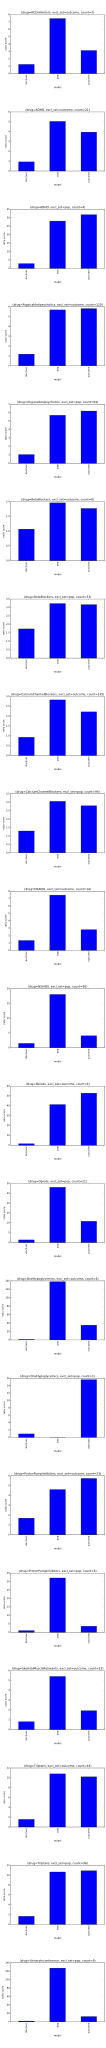

In [105]:
fig, axes_list = plt.subplots(nrows=21, ncols=1, figsize=[7, 150])

i = 0
for drug, drug_df in df.groupby('drug'):
    for excl_set, excl_df in drug_df.groupby('excl_set'):
        if np.all(excl_df.nb_out == 0):
            continue

        title = '(drug={}, excl_set={}, count={})'.format(drug, excl_set, excl_df.nb_out.iloc[0])
        axes = excl_df.set_index('model')['ratio'].plot(ax=axes_list[i], kind='bar', title=title)
        axes.set_ylabel('ratio score')
        
        i += 1
    
fig.subplots_adjust(wspace=.35, hspace=.65)